In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import io
wine_data = io.loadmat("data.mat")
#load the data and import relevant packages.

In [2]:
#split up the data into training data, training labels, and test data.
x_train = wine_data['X']
y_train = wine_data['y']
x_test = wine_data['X_test']

In [3]:
x_train = np.hstack((x_train, np.ones((6000, 1))))

In [4]:
#part (1)
#batch gradient descent algorithm
epsilon = -0.0000001
lamb = 0.000001
correction = 0.99

In [5]:
iterlst = [100, 500, 1000, 2000, 5000, 10000]

In [6]:
def logistic(item):
    return 1/(1 + np.exp(-item))
logistic = np.vectorize(logistic)

In [7]:
def batch_alg(x, y):
    wlst = []
    w = np.ndarray((13, 1))
    w.fill(0)
    i = 0
    while i < 10001:
        if i in iterlst:
            wlst.append(w)
        dotprod = np.matmul(x, w)
        dotprod = logistic(dotprod)
        gradient = np.subtract(2*lamb*w, np.matmul(np.transpose(x), (y - dotprod)))
        w = w + epsilon*gradient
        i += 1
    return wlst

In [8]:
weight_results = batch_alg(x_train, y_train)

In [9]:
def batch_cost_fn(w, x, y):
    sum_of_squares = lamb * sum([x**2 for x in w])
    summation_1 = sum([y[i]*np.log(logistic(np.dot(x[i], w))) for i in range(len(x)) if logistic(np.dot(x[i], w)) > 0])
    summation_2 = sum([(1 - y[z])*np.log(1- logistic(np.dot(x[z], w))) for z in range(len(x)) if (1 - logistic(np.dot(x[z], w))) > 0])
    return sum_of_squares - (summation_1 + summation_2)

In [10]:
res1 = batch_cost_fn(weight_results[0], x_train, y_train)

In [11]:
res2 = batch_cost_fn(weight_results[1], x_train, y_train)

In [12]:
res3 = batch_cost_fn(weight_results[2], x_train, y_train)

In [13]:
res4 = batch_cost_fn(weight_results[3], x_train, y_train)

In [14]:
res5 = batch_cost_fn(weight_results[4], x_train, y_train)

In [15]:
res6 = batch_cost_fn(weight_results[5], x_train, y_train)

In [16]:
results = [res1, res2, res3, res4, res5, res6]
results = [y[0] for y in results]

Text(0.5, 0, 'Iteration Size')

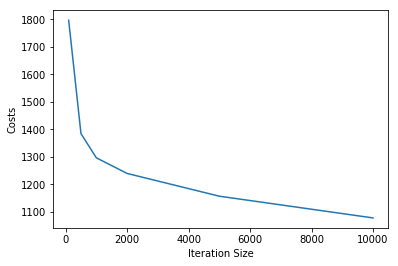

In [17]:
plt.plot(iterlst, results)
plt.ylabel('Costs')
plt.xlabel('Iteration Size')

In [18]:
#part (2) 
#stochastic gradient algorithm

In [19]:
def stoch_alg(x, y):
    wlst = []
    w = np.ndarray((13, 1))
    w.fill(0)
    i = 0
    while i < 10001:
        if i in iterlst:
            wlst.append(w)
        ran = np.random.choice(np.arange(len(x)))
        ran_x = np.reshape(x[ran], (1, 13))
        ran_y = y[ran]
        dotprod = np.matmul(ran_x, w)
        dotprod = logistic(dotprod)
        gradient = np.subtract(2*lamb*w, np.matmul(np.transpose(ran_x), (ran_y - dotprod)))
        w = w + epsilon*gradient
        i += 1
    return wlst 

In [20]:
stochresults = stoch_alg(x_train, y_train)

In [21]:
sres1 = batch_cost_fn(stochresults[0], x_train, y_train)

In [22]:
sres2 = batch_cost_fn(stochresults[1], x_train, y_train)

In [23]:
sres3 = batch_cost_fn(stochresults[2], x_train, y_train)

In [24]:
sres4 = batch_cost_fn(stochresults[3], x_train, y_train)

In [25]:
sres5 = batch_cost_fn(stochresults[4], x_train, y_train)

In [26]:
sres6 = batch_cost_fn(stochresults[5], x_train, y_train)

In [27]:
sress = [sres1, sres2, sres3, sres4, sres5, sres6]
sress = [x[0] for x in sress]

Text(0, 0.5, 'Cost')

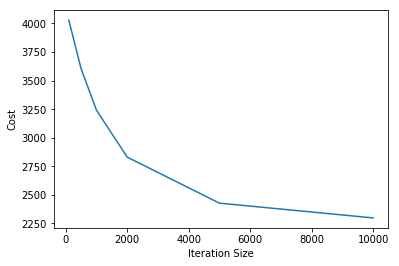

In [28]:
plt.plot(iterlst, sress)
plt.xlabel('Iteration Size')
plt.ylabel('Cost')

It appears that batch gradient descent is less costly than stochastic gradient descent. This makes sense since the batch method considers every point in each iteration and is more accurate than selecting a random point and hoping that it keeps moving down the convex cost function as you have to assume in stochastic gradient descent. While the batch method is more accurate, it is computationally more expensive than stochastic gradient descent, since in the stochastic method, there are less computations involved since you are computing all gradients and matrix multiplications with respect to 1 point instead of 6000 points. 

In [29]:
#part (3)
#variable learning rate for stochastic gradient descent
def var_stoch_alg(x, y):
    temp = epsilon
    wlst = []
    w = np.ndarray((13, 1))
    w.fill(0)
    i = 0
    while i < 10001:
        if i in iterlst:
            wlst.append(w)
            temp = temp - (1/i)
        ran = np.random.choice(np.arange(len(x)))
        ran_x = np.reshape(x[ran], (1, 13))
        ran_y = y[ran]
        dotprod = np.matmul(ran_x, w)
        dotprod = logistic(dotprod)
        gradient = np.subtract(2*lamb*w, np.matmul(np.transpose(ran_x), (ran_y - dotprod)))
        w = w + temp*gradient
        i += 1
    return wlst 

In [30]:
varstochresults = var_stoch_alg(x_train, y_train)

In [31]:
varres1 = batch_cost_fn(varstochresults[0], x_train, y_train)
varres2 = batch_cost_fn(varstochresults[1], x_train, y_train)
varres3 = batch_cost_fn(varstochresults[2], x_train, y_train)
varres4 = batch_cost_fn(varstochresults[3], x_train, y_train)
varres5 = batch_cost_fn(varstochresults[4], x_train, y_train)
varres6 = batch_cost_fn(varstochresults[5], x_train, y_train)

Text(0, 0.5, 'Cost')

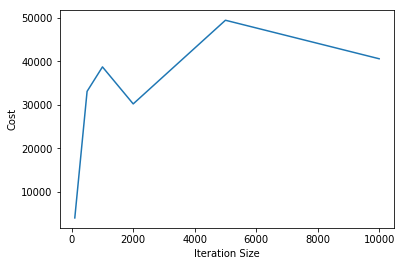

In [32]:
varress = [varres1, varres2, varres3, varres4, varres5, varres6]
varress = [x[0] for x in varress]
plt.plot(iterlst, varress)
plt.xlabel('Iteration Size')
plt.ylabel('Cost')

In this case, variable learning rate is worse than having a constant learning rate. 

In [33]:
#part (d)
#kaggle submission
#we use batch gradient descent since this performed better than our stochastic model.

In [34]:
x_test = np.hstack((x_test, np.ones((497, 1))))

In [38]:
#we use results[5] as our weight vector since this produced the best result.
def test_batch(test):
    dotprod = np.matmul(x_test, weight_results[5])
    dotprod = logistic(dotprod)
    return dotprod

In [43]:
kaggle_results = test_batch(x_test)

In [47]:
lst_to_submit = []
for y in kaggle_results:
    if y > 0.5:
        lst_to_submit.append(1)
    else:
        lst_to_submit.append(0)

In [49]:
len(lst_to_submit)

497

In [50]:
from save_csv import results_to_csv

In [52]:
results_to_csv(np.array(lst_to_submit))